# Classifier for Hand-written Digits

In [1]:
# imports
import sys
import numpy as np
import matplotlib.pyplot as plt
import random
sys.path.append('..\..') # hack to make cnn project imports work
from Network import Network 
from Main import TestNetwork, TrainNetwork
from HyperParameters import HyperParameters

# Prepare Data
Loads data from Mnist files into three datasets. Displays some example data.

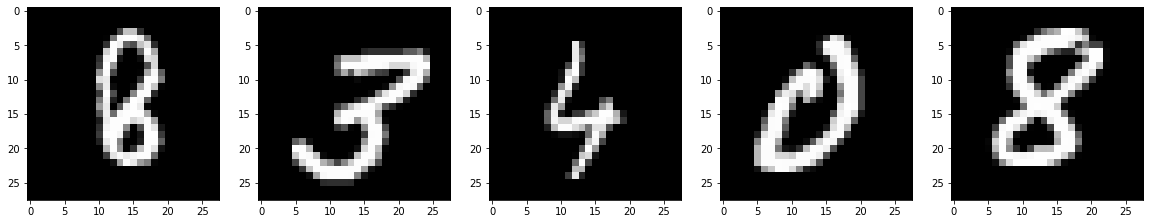

In [2]:
from Mnist import Mnist
ds_tr, ds_va, ds_te = Mnist.Load('data') # load training, validation and testing datasets

# plot some random examples from the training set
num_plots = 5
egs = random.choices(ds_tr.data, k=num_plots)
fig, axs = plt.subplots(ncols=5, figsize=(20,num_plots))
for i in range(num_plots): axs[i].imshow(Mnist.Expand(egs[i]), cmap='gray') # draw randomly expanded examples

# Create/Load Network

In [2]:
# these need to be eventually moved
params = HyperParameters(eta=0.05, L2=0.0001, mu=0.25, batch_size=128, expand_data=True) # set hyper-parameters

In [7]:
# create new network from json
net_str = ('{ "network": [ '
    '{ "layer": "input", "shape": [ 28,28,1 ] }, '
    '{ "layer": "full_con", "size": 200, "act_func": "leaky_relu" }, '
    '{ "layer": "full_con", "size": 50, "act_func": "leaky_relu" }, '
    '{ "layer": "softmax_output", "size": 10 } '
    '] }')
net = Network(net_str, params)
net.Print() # print network model

input: shape=(28, 28, 1)
full_con: size=200, act_func=leaky_relu
full_con: size=50, act_func=leaky_relu
softmax_output: size=10


In [8]:
net = Network('nn_in.json', params) # load network from file
net.Print() # print network model

input: shape=(28, 28, 1)
full_con: size=50, act_func=sigmoid
xent_output: size=10, act_func=sigmoid


# Test Network Against Each Dataset

In [ ]:
# test network against data sets
n_correct = TestNetwork(net, ds_tr) # test using training data
print('Training data: {:.2%}'.format(n_correct/ds_tr.num)) # display results
n_correct = TestNetwork(net, ds_te)
print('Test data: {:.2%}'.format(n_correct/ds_te.num)) # display results

In [ ]:
# train network
num_epochs = 50 # number of epochs of training
TrainNetwork(net, ds_tr, num_epochs, params)

In [ ]:
# save network to output file
net.Save('nn_out.json') 